In [2]:
from skimage import io, feature
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
img_path = r'AIGC-Detection-Dataset\AIGC-Detection-Dataset\train\0_real\000000000025.jpg'

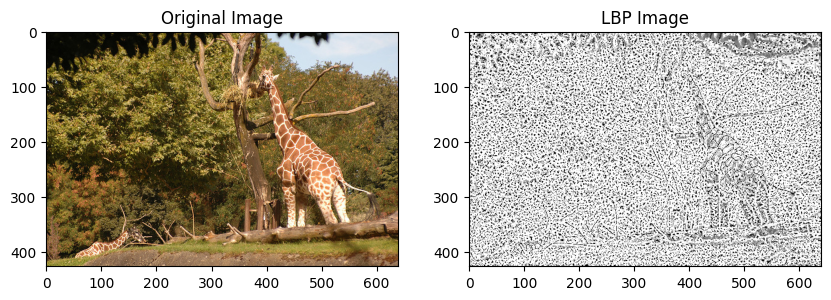

In [9]:
def extract_texture_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray_image = gray_image.astype(np.uint8)  # Convert to integer type
    radius = 3
    n_points = 8 * radius
    lbp = feature.local_binary_pattern(gray_image, n_points, radius, method='uniform')

    lbp = lbp / lbp.max()  # Normalize the LBP values to the range [0, 1]
    
    return lbp

# Load the image
image = io.imread(img_path)

# Extract texture features
lbp_image = extract_texture_features(image)

# Display the original image and the LBP result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('LBP Image')
plt.imshow(lbp_image, cmap='gray')
plt.show()

In [7]:
import numpy as np
import cv2

In [8]:
def extract_texture_features(image):
    gabor_kernels = []
    for theta in np.arange(0, np.pi, np.pi / 4):
        kernel = cv2.getGaborKernel((9, 9), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        gabor_kernels.append(kernel)
    filters = [cv2.filter2D(image, cv2.CV_8UC3, kernel) for kernel in gabor_kernels]
    return np.stack(filters, axis=0)

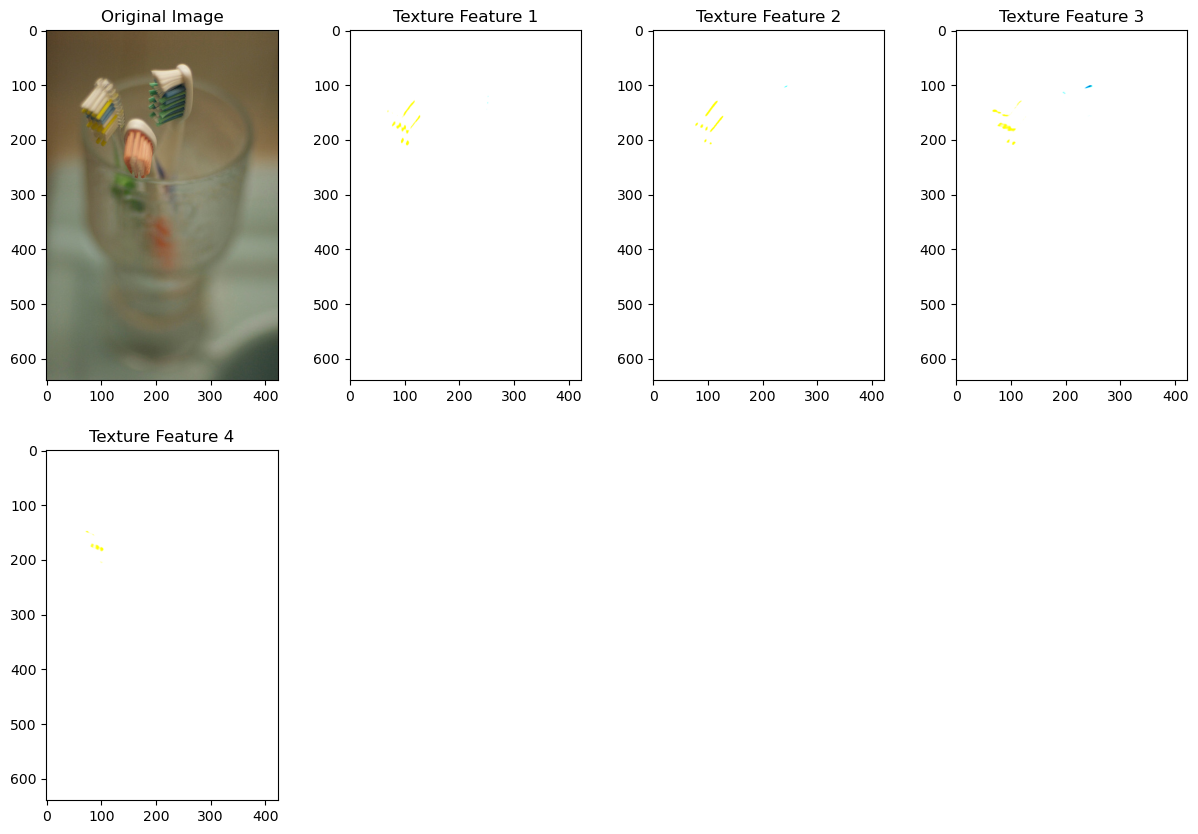

In [14]:
# Extract texture features using the defined function
new_img = io.imread(r'AIGC-Detection-Dataset\AIGC-Detection-Dataset\train\0_real\000000000562.jpg')

texture_features = extract_texture_features(new_img)

# Display the original image and the texture features
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1)
plt.title('Original Image')
plt.imshow(new_img)

for i in range(texture_features.shape[0]):
    plt.subplot(2, 4, i + 2)
    plt.title(f'Texture Feature {i + 1}')
    plt.imshow(texture_features[i], cmap='gray')

plt.show()